In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import json
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.cross_validation import KFold,cross_val_score,train_test_split
import tensorflow as tf
from dateutil import parser
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (10,8)

G:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
G:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
G:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Process Data

In [2]:
billboard = pd.read_csv("billboard_chart_data.csv")  #read the billboard chart data which we use billboard API to get

In [3]:
billboard = billboard[['title','artist','rank', 'date']]

In [4]:
billboard.head()

,title,artist,rank,date
0,God's Plan,Drake,1,2018-02-17
1,Perfect,Ed Sheeran,2,2018-02-17
2,Finesse,Bruno Mars & Cardi B,3,2018-02-17
3,Havana,Camila Cabello Featuring Young Thug,4,2018-02-17
4,Rockstar,Post Malone Featuring 21 Savage,5,2018-02-17


In [5]:
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100066 entries, 0 to 100065
Data columns (total 4 columns):
title     100066 non-null object
artist    100066 non-null object
rank      100066 non-null int64
date      100066 non-null object
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


In [6]:
track = pd.read_csv("Full_data.csv")  # read all the track's audio feature data(Use Spotify API to get)

In [7]:
track.head()

,id,title,artist,track_id,artist_id,rank,hit,artist_popularity,followers,popularity,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1,God's Plan,Drake,2XW4DbS6NddZxRPm5rMCeY,3TVXtAsR1Inumwj472S9r4,1,Yes,100,18311322,99,...,0.454,7,-9.488,1,0.0963,0.0244,0.000056,0.4980,0.344,77.170
1,2,Perfect,Ed Sheeran,0tgVpDi06FyKpA1z0VMD4v,6eUKZXaKkcviH0Ku9w2n3V,1,Yes,96,21431294,95,...,0.448,8,-6.312,1,0.0232,0.1630,0.000000,0.1060,0.168,95.050
2,3,Finesse,Bruno Mars & Cardi B,3Vo4wInECJQuz9BIBMOu8i,0du5cEVh5yTK9QJze8zA0C,3,Yes,91,11594549,95,...,0.859,5,-4.877,0,0.0996,0.0185,0.000000,0.0215,0.926,105.115
3,4,Havana,Camila Cabello Featuring Young Thug,1rfofaqEpACxVEHIZBJe6W,4nDoRrQiYLoBzwC5BhVJzF,1,Yes,91,3144195,97,...,0.523,2,-4.333,1,0.0300,0.1840,0.000036,0.1320,0.394,104.988
4,5,Rockstar,Post Malone Featuring 21 Savage,0OAAAdiHJKa2wlCKqaYXV7,246dkjvS1zLTtiykXe5h60,1,Yes,96,3309267,90,...,0.535,5,-6.637,0,0.0776,0.1300,0.000130,0.1430,0.127,159.764


In [8]:
track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 21 columns):
id                   6237 non-null int64
title                6237 non-null object
artist               6237 non-null object
track_id             6237 non-null object
artist_id            6237 non-null object
rank                 6237 non-null int64
hit                  6237 non-null object
artist_popularity    6237 non-null int64
followers            6237 non-null int64
popularity           6237 non-null int64
danceability         6237 non-null float64
energy               6237 non-null float64
key                  6237 non-null int64
loudness             6237 non-null float64
mode                 6237 non-null int64
speechiness          6237 non-null float64
acousticness         6237 non-null float64
instrumentalness     6237 non-null float64
liveness             6237 non-null float64
valence              6237 non-null float64
tempo                6237 non-null float64
dtypes: f

In [9]:
merge_data = pd.merge(billboard,track,on=['title','artist']) #merge the two table by title and artist

In [10]:
del merge_data['rank_y']
del merge_data['hit']

In [11]:
merge_data.head()

,title,artist,rank_x,date,id,track_id,artist_id,artist_popularity,followers,popularity,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,God's Plan,Drake,1,2018-02-17,1,2XW4DbS6NddZxRPm5rMCeY,3TVXtAsR1Inumwj472S9r4,100,18311322,99,...,0.454,7,-9.488,1,0.0963,0.0244,0.000056,0.498,0.344,77.17
1,God's Plan,Drake,1,2018-02-10,1,2XW4DbS6NddZxRPm5rMCeY,3TVXtAsR1Inumwj472S9r4,100,18311322,99,...,0.454,7,-9.488,1,0.0963,0.0244,0.000056,0.498,0.344,77.17
2,God's Plan,Drake,1,2018-02-03,1,2XW4DbS6NddZxRPm5rMCeY,3TVXtAsR1Inumwj472S9r4,100,18311322,99,...,0.454,7,-9.488,1,0.0963,0.0244,0.000056,0.498,0.344,77.17
3,Perfect,Ed Sheeran,2,2018-02-17,2,0tgVpDi06FyKpA1z0VMD4v,6eUKZXaKkcviH0Ku9w2n3V,96,21431294,95,...,0.448,8,-6.312,1,0.0232,0.1630,0.000000,0.106,0.168,95.05
4,Perfect,Ed Sheeran,2,2018-02-10,2,0tgVpDi06FyKpA1z0VMD4v,6eUKZXaKkcviH0Ku9w2n3V,96,21431294,95,...,0.448,8,-6.312,1,0.0232,0.1630,0.000000,0.106,0.168,95.05


In [12]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89689 entries, 0 to 89688
Data columns (total 21 columns):
title                89689 non-null object
artist               89689 non-null object
rank_x               89689 non-null int64
date                 89689 non-null object
id                   89689 non-null int64
track_id             89689 non-null object
artist_id            89689 non-null object
artist_popularity    89689 non-null int64
followers            89689 non-null int64
popularity           89689 non-null int64
danceability         89689 non-null float64
energy               89689 non-null float64
key                  89689 non-null int64
loudness             89689 non-null float64
mode                 89689 non-null int64
speechiness          89689 non-null float64
acousticness         89689 non-null float64
instrumentalness     89689 non-null float64
liveness             89689 non-null float64
valence              89689 non-null float64
tempo                89689 non

In [13]:
merge_data = merge_data.sort_values(by=['date','rank_x'],ascending=True)  #sort the merger data according to date and rank_x

In [14]:
merge_data.to_csv("merge_data.csv", index = None)  #save data to csv file

In [15]:
df = pd.read_csv("merge_data.csv")

In [16]:
df.head()

,title,artist,rank_x,date,id,track_id,artist_id,artist_popularity,followers,popularity,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,I'm Your Angel,R. Kelly & Celine Dion,1,1998-12-12,7132,0QWFiyhOqFu9RP8qzP6z5L,2mxe0TnaNL039ysAj51xPQ,77,1465113,44,...,0.504,0,-7.260,1,0.0301,0.66900,0.000000,0.1100,0.266,112.681
1,Nobody's Supposed To Be Here,Deborah Cox,2,1998-12-12,7121,51QxenFmXlJXUN9mpvxlaL,601893mmW5hl1FBOykWZHG,55,160121,56,...,0.531,8,-5.300,1,0.0361,0.20200,0.000012,0.5950,0.399,119.957
2,Doo Wop (That Thing),Lauryn Hill,4,1998-12-12,7134,2Uu8IiLkLY0UXhCHka4Dlr,2Mu5NfyYm8n5iTomuKAEHl,70,816631,74,...,0.505,2,-8.926,0,0.2450,0.03930,0.000000,0.0923,0.495,99.935
3,From This Moment On,Shania Twain,5,1998-12-12,7161,7n2vETKqnlDt4670aVs5n5,5e4Dhzv426EvQe3aDb64jL,71,865667,50,...,0.514,7,-5.021,1,0.0271,0.38200,0.000000,0.1860,0.148,135.819
4,Love Like This,Faith Evans,7,1998-12-12,7140,7MQywXGHEev7JmwwIzMcao,5NDMothbpdpq2xHqSjrrWn,70,372926,60,...,0.551,0,-7.328,1,0.0616,0.00364,0.000000,0.0451,0.796,100.904


In [17]:
# label every songs “Yse” or "No" by their rank in given date, if rank lower than 30, label "Yes", otherwise, label "No" 
peak = []
for i in range(0, len(df)):
    tmp = []
    c = df['rank_x'][i]
    if c < 30:
        tmp.append("Yes")
    else:
        tmp.append("No")
    peak.append(tmp)
df_peak = pd.DataFrame(peak)
df_peak.columns = ['hit']

In [18]:
print(df_peak.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89689 entries, 0 to 89688
Data columns (total 1 columns):
hit    89689 non-null object
dtypes: object(1)
memory usage: 700.8+ KB
None


In [19]:
result = pd.concat([df, df_peak], axis=1)  #concat df with df_peak 

In [20]:
result.head()

,title,artist,rank_x,date,id,track_id,artist_id,artist_popularity,followers,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,hit
0,I'm Your Angel,R. Kelly & Celine Dion,1,1998-12-12,7132,0QWFiyhOqFu9RP8qzP6z5L,2mxe0TnaNL039ysAj51xPQ,77,1465113,44,...,0,-7.260,1,0.0301,0.66900,0.000000,0.1100,0.266,112.681,Yes
1,Nobody's Supposed To Be Here,Deborah Cox,2,1998-12-12,7121,51QxenFmXlJXUN9mpvxlaL,601893mmW5hl1FBOykWZHG,55,160121,56,...,8,-5.300,1,0.0361,0.20200,0.000012,0.5950,0.399,119.957,Yes
2,Doo Wop (That Thing),Lauryn Hill,4,1998-12-12,7134,2Uu8IiLkLY0UXhCHka4Dlr,2Mu5NfyYm8n5iTomuKAEHl,70,816631,74,...,2,-8.926,0,0.2450,0.03930,0.000000,0.0923,0.495,99.935,Yes
3,From This Moment On,Shania Twain,5,1998-12-12,7161,7n2vETKqnlDt4670aVs5n5,5e4Dhzv426EvQe3aDb64jL,71,865667,50,...,7,-5.021,1,0.0271,0.38200,0.000000,0.1860,0.148,135.819,Yes
4,Love Like This,Faith Evans,7,1998-12-12,7140,7MQywXGHEev7JmwwIzMcao,5NDMothbpdpq2xHqSjrrWn,70,372926,60,...,0,-7.328,1,0.0616,0.00364,0.000000,0.0451,0.796,100.904,Yes


In [21]:
result.to_csv("billboard_charts.csv", index = None)

In [22]:
# Calculate the number of days with the first day
time = []
for i in range(0, len(result)):
    tmp = []
    if i == 0:
        tmp.append("0")
    else:
        df1 = parser.parse(result['date'][0])
        df2 = parser.parse(result['date'][i])
        df = (df2-df1).days
        #print(df)
        tmp.append(df)
    time.append(tmp)
df_days = pd.DataFrame(time)
df_days.columns= ['days']

In [23]:
LSTM_data = pd.concat([result, df_days], axis=1)

In [24]:
LSTM_data.head()

,title,artist,rank_x,date,id,track_id,artist_id,artist_popularity,followers,popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,hit,days
0,I'm Your Angel,R. Kelly & Celine Dion,1,1998-12-12,7132,0QWFiyhOqFu9RP8qzP6z5L,2mxe0TnaNL039ysAj51xPQ,77,1465113,44,...,-7.260,1,0.0301,0.66900,0.000000,0.1100,0.266,112.681,Yes,0
1,Nobody's Supposed To Be Here,Deborah Cox,2,1998-12-12,7121,51QxenFmXlJXUN9mpvxlaL,601893mmW5hl1FBOykWZHG,55,160121,56,...,-5.300,1,0.0361,0.20200,0.000012,0.5950,0.399,119.957,Yes,0
2,Doo Wop (That Thing),Lauryn Hill,4,1998-12-12,7134,2Uu8IiLkLY0UXhCHka4Dlr,2Mu5NfyYm8n5iTomuKAEHl,70,816631,74,...,-8.926,0,0.2450,0.03930,0.000000,0.0923,0.495,99.935,Yes,0
3,From This Moment On,Shania Twain,5,1998-12-12,7161,7n2vETKqnlDt4670aVs5n5,5e4Dhzv426EvQe3aDb64jL,71,865667,50,...,-5.021,1,0.0271,0.38200,0.000000,0.1860,0.148,135.819,Yes,0
4,Love Like This,Faith Evans,7,1998-12-12,7140,7MQywXGHEev7JmwwIzMcao,5NDMothbpdpq2xHqSjrrWn,70,372926,60,...,-7.328,1,0.0616,0.00364,0.000000,0.0451,0.796,100.904,Yes,0


In [25]:
LSTM_data.to_csv('LSTM_data.csv',index = None)

## Linear Model

In [26]:
df = pd.read_csv("Full_data.csv") # read data
df = df[['rank','artist_popularity','followers','popularity','danceability','energy','key','loudness','mode','speechiness','acousticness'
         ,'instrumentalness','liveness','valence','tempo']]
data_zs = preprocessing.normalize(df, norm='l2') # normalization
data_zs = pd.DataFrame(data_zs)
data_zs.columns = ['rank','artist_popularity','followers','popularity','danceability','energy','key','loudness','mode','speechiness','acousticness'
         ,'instrumentalness','liveness','valence','tempo'] # add columns name

In [27]:
data_zs.corr()

,rank,artist_popularity,followers,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
rank,1.000000,0.705908,-0.796614,0.770435,0.907101,0.947498,0.860511,-0.763978,0.744715,0.630041,0.694758,0.138772,0.799281,0.877603,0.890368
artist_popularity,0.705908,1.000000,-0.581229,0.941691,0.767426,0.771203,0.676481,-0.621750,0.471224,0.619311,0.529364,0.025657,0.541195,0.792695,0.796074
followers,-0.796614,-0.581229,1.000000,-0.702855,-0.899792,-0.802854,-0.831456,0.907869,-0.707081,-0.702654,-0.628552,-0.069452,-0.772676,-0.805326,-0.909881
popularity,0.770435,0.941691,-0.702855,1.000000,0.848601,0.835431,0.752888,-0.711136,0.548270,0.707142,0.618129,0.012811,0.644572,0.866959,0.856565
danceability,0.907101,0.767426,-0.899792,0.848601,1.000000,0.953093,0.886522,-0.907028,0.776749,0.803351,0.592107,0.131064,0.857685,0.943912,0.958921
energy,0.947498,0.771203,-0.802854,0.835431,0.953093,1.000000,0.857838,-0.800408,0.785333,0.729046,0.594591,0.141285,0.853236,0.939267,0.923472
key,0.860511,0.676481,-0.831456,0.752888,0.886522,0.857838,1.000000,-0.867666,0.706227,0.657342,0.703256,0.098196,0.767902,0.828896,0.872165
loudness,-0.763978,-0.621750,0.907869,-0.711136,-0.907028,-0.800408,-0.867666,1.000000,-0.765798,-0.783093,-0.588246,-0.210410,-0.783172,-0.775187,-0.911791
mode,0.744715,0.471224,-0.707081,0.548270,0.776749,0.785333,0.706227,-0.765798,1.000000,0.593416,0.377448,0.006030,0.771454,0.717171,0.765360
speechiness,0.630041,0.619311,-0.702654,0.707142,0.803351,0.729046,0.657342,-0.783093,0.593416,1.000000,0.503829,0.023720,0.763651,0.790136,0.730178


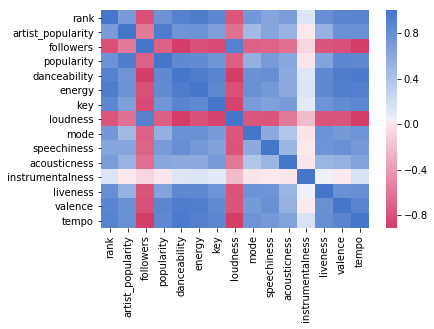

In [28]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
sns.heatmap(data_zs.corr(), cmap=cmap)

In [29]:
# Use RFE to select feature
logreg = LinearRegression()
rfe = RFE(logreg, 10)
X = ['artist_popularity','followers','popularity','danceability','energy','key','loudness','mode','speechiness','acousticness'
,'instrumentalness','liveness','valence','tempo']
y = ['rank']
rfe = rfe.fit(data_zs[X], data_zs[y] )
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True False  True  True  True  True  True  True
  True False]
[2 4 1 1 1 3 1 1 1 1 1 1 1 5]


G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
x = data_zs[["danceability","energy",'valence','liveness','instrumentalness','speechiness','acousticness']]
X = sm.add_constant(x)
y = data_zs["rank"]
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.442e+04
Date:                Sat, 21 Apr 2018   Prob (F-statistic):               0.00
Time:                        12:41:40   Log-Likelihood:                 23248.
No. Observations:                6237   AIC:                        -4.648e+04
Df Residuals:                    6229   BIC:                        -4.643e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.497e-05   7.41e-05     -0.741      0.458      -0.000    9.04e-05
danceability        17.7715      1.288     13.794      0.000      15.246      20.297
energy              65.7134      1.394     47.132      0.000      62.980      68.447
valence             11.8673      1.339      8.865      0.000       9.243      14.491
liveness            21.1383      1.952     10.827      0.000      17.311      24.966
instrumentalness     9.6370      1.689      5.706      0.000       6.326      12.948
speechiness       -104.4557      2.516    -41.519      0.000    -109.388     -99.524
acousticness        52.0083      0.906     57.384      0.000      50.232      53.785
==============================================================================
Omnibus:                     4646.598   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32058791.271
Skew:                          -1.813   Prob(JB):                         0.00
Kurtosis:                     354.211   Cond. No.                     4.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
x = data_zs[['artist_popularity','followers','popularity','danceability','energy','key','loudness','mode','speechiness','acousticness'
,'instrumentalness','valence']]
X = sm.add_constant(x)
y = data_zs["rank"]
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.041e+04
Date:                Sat, 21 Apr 2018   Prob (F-statistic):               0.00
Time:                        12:41:40   Log-Likelihood:                 23880.
No. Observations:                6237   AIC:                        -4.773e+04
Df Residuals:                    6224   BIC:                        -4.765e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0472      0.009     -5.532      0.000      -0.064      -0.030
artist_popularity     0.3048      0.045      6.810      0.000       0.217       0.392
followers             0.0472      0.009      5.534      0.000       0.030       0.064
popularity           -0.7923      0.035    -22.894      0.000      -0.860      -0.724
danceability         61.4343      2.138     28.735      0.000      57.243      65.625
energy               51.4285      1.520     33.842      0.000      48.449      54.408
key                  -0.1194      0.095     -1.260      0.208      -0.305       0.066
loudness              1.6473      0.143     11.529      0.000       1.367       1.927
mode                  7.2519      0.593     12.233      0.000       6.090       8.414
speechiness         -85.3607      2.923    -29.198      0.000     -91.092     -79.630
acousticness         70.5195      1.142     61.745      0.000      68.281      72.758
instrumentalness     14.0853      1.931      7.293      0.000      10.299      17.871
valence              12.6765      1.435      8.835      0.000       9.864      15.489
==============================================================================
Omnibus:                     4696.602   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15831316.449
Skew:                           1.988   Prob(JB):                         0.00
Kurtosis:                     249.786   Cond. No.                     6.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Logistic Regression 

In [32]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [33]:
data = pd.read_csv("Full_data.csv")
data.hit.replace(('Yes', 'No'), (1, 0), inplace=True)
max_abs_scaler = preprocessing.MaxAbsScaler()
data_zs = max_abs_scaler.fit_transform(data[['artist_popularity','followers','popularity','energy','loudness','mode','tempo']])
data_zs = pd.DataFrame(data_zs)

In [34]:
data_zs.head()

,0,1,2,3,4,5,6
0,1.00,0.854395,1.000000,0.455823,-0.430979,1.0,0.361051
1,0.96,0.999971,0.959596,0.449799,-0.286714,1.0,0.444705
2,0.91,0.540994,0.959596,0.862450,-0.221531,0.0,0.491796
3,0.91,0.146706,0.979798,0.525100,-0.196820,1.0,0.491202
4,0.96,0.154408,0.909091,0.537149,-0.301476,0.0,0.747479


In [35]:
L_model =sm.Logit(data['hit'],data_zs).fit()
L_model.summary()

Optimization terminated successfully.
         Current function value: 0.582265
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    hit   No. Observations:                 6237
Model:                          Logit   Df Residuals:                     6230
Method:                           MLE   Df Model:                            6
Date:                Sat, 21 Apr 2018   Pseudo R-squ.:                 0.09279
Time:                        12:41:40   Log-Likelihood:                -3631.6
converged:                       True   LL-Null:                       -4003.0
                                        LLR p-value:                3.328e-157
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -3.0881      0.286    -10.784      0.000      -3.649      -2.527
1              1.6158      0.179      9.044      0.000       1.266       1.966
2              6.0623      0.276     21.999      0.000       5.522       6.602
3             -0.9523      0.167     -5.716      0.000      -1.279      -0.626
4              2.7656      0.309      8.946      0.000       2.160       3.371
5             -0.1689      0.060     -2.824      0.005      -0.286      -0.052
6             -1.2393      0.205     -6.043      0.000      -1.641      -0.837
==============================================================================
"""

##  Cross-validate the model

In [36]:
X = data_zs
y = data["hit"]
X=np.array(X)
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)
clf = LogisticRegression()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
['popularity','danceability','energy','key','loudness','valence','tempo']

[0.64       0.688      0.664      0.696      0.672      0.688
 0.736      0.656      0.69354839 0.69354839]
Accuracy: 0.68 (+/- 0.05)


['popularity', 'danceability', 'energy', 'key', 'loudness', 'valence', 'tempo']

## Confusion Matrix

In [37]:
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[730  90]
 [319 109]]


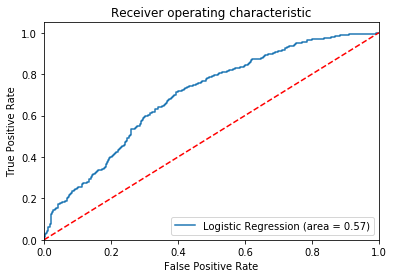

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Deep Learning model（CNN）

We want to use CNN to predict whether a given track can reach top 30 by using their artist's popularity, followers, and audion feature, audio analysis information which we get on spotify api.

In [39]:
data = pd.read_csv("Full_data.csv")

In [40]:
data.head()

,id,title,artist,track_id,artist_id,rank,hit,artist_popularity,followers,popularity,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1,God's Plan,Drake,2XW4DbS6NddZxRPm5rMCeY,3TVXtAsR1Inumwj472S9r4,1,Yes,100,18311322,99,...,0.454,7,-9.488,1,0.0963,0.0244,0.000056,0.4980,0.344,77.170
1,2,Perfect,Ed Sheeran,0tgVpDi06FyKpA1z0VMD4v,6eUKZXaKkcviH0Ku9w2n3V,1,Yes,96,21431294,95,...,0.448,8,-6.312,1,0.0232,0.1630,0.000000,0.1060,0.168,95.050
2,3,Finesse,Bruno Mars & Cardi B,3Vo4wInECJQuz9BIBMOu8i,0du5cEVh5yTK9QJze8zA0C,3,Yes,91,11594549,95,...,0.859,5,-4.877,0,0.0996,0.0185,0.000000,0.0215,0.926,105.115
3,4,Havana,Camila Cabello Featuring Young Thug,1rfofaqEpACxVEHIZBJe6W,4nDoRrQiYLoBzwC5BhVJzF,1,Yes,91,3144195,97,...,0.523,2,-4.333,1,0.0300,0.1840,0.000036,0.1320,0.394,104.988
4,5,Rockstar,Post Malone Featuring 21 Savage,0OAAAdiHJKa2wlCKqaYXV7,246dkjvS1zLTtiykXe5h60,1,Yes,96,3309267,90,...,0.535,5,-6.637,0,0.0776,0.1300,0.000130,0.1430,0.127,159.764


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 21 columns):
id                   6237 non-null int64
title                6237 non-null object
artist               6237 non-null object
track_id             6237 non-null object
artist_id            6237 non-null object
rank                 6237 non-null int64
hit                  6237 non-null object
artist_popularity    6237 non-null int64
followers            6237 non-null int64
popularity           6237 non-null int64
danceability         6237 non-null float64
energy               6237 non-null float64
key                  6237 non-null int64
loudness             6237 non-null float64
mode                 6237 non-null int64
speechiness          6237 non-null float64
acousticness         6237 non-null float64
instrumentalness     6237 non-null float64
liveness             6237 non-null float64
valence              6237 non-null float64
tempo                6237 non-null float64
dtypes: f

In [42]:
data.duplicated().sum()

0

In [43]:
data.describe()

,id,rank,artist_popularity,followers,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,6237.000000,6237.000000,6237.000000,6.237000e+03,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000
mean,3515.977233,46.833093,72.287959,2.818100e+06,57.089145,0.625627,0.698398,5.255892,-5.833668,0.678211,0.099974,0.161373,0.008434,0.185531,0.518813,121.944461
std,2095.961730,29.967952,14.870323,4.272673e+06,14.185772,0.144532,0.170741,3.563445,2.146704,0.467200,0.101689,0.203845,0.066063,0.141792,0.223985,28.966124
min,1.000000,1.000000,0.000000,2.000000e+00,0.000000,0.113000,0.056500,0.000000,-22.015000,0.000000,0.022400,0.000003,0.000000,0.016400,0.034900,51.316000
25%,1683.000000,20.000000,64.000000,3.556930e+05,48.000000,0.529000,0.587000,2.000000,-6.965000,0.000000,0.035100,0.017300,0.000000,0.094400,0.338000,98.011000
50%,3454.000000,46.000000,75.000000,1.083347e+06,58.000000,0.628000,0.723000,5.000000,-5.531000,1.000000,0.052900,0.072600,0.000000,0.129000,0.520000,120.637000
75%,5329.000000,73.000000,82.000000,3.019306e+06,67.000000,0.725000,0.832000,8.000000,-4.341000,1.000000,0.120000,0.231000,0.000017,0.243000,0.694000,140.171000
max,7234.000000,100.000000,100.000000,2.143193e+07,99.000000,0.994000,0.996000,11.000000,-0.463000,1.000000,0.765000,0.986000,0.982000,0.987000,0.976000,213.737000


## Split data

In [44]:
x_train ,x_test = train_test_split(data,test_size=0.25)  #split data into train data and test data

In [45]:
x_train.head()

,id,title,artist,track_id,artist_id,rank,hit,artist_popularity,followers,popularity,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1039,1119,Worth It,Fifth Harmony Featuring Kid Ink,41Fflg7qHiVOD6dEPvsCzO,1l8Fu6IkuTP0U5QetQJ5Xt,12,Yes,80,4786833,78,...,0.765,8,-3.865,1,0.0882,0.063,0.000007,0.1180,0.594,99.987
1541,1662,Headlights,Eminem Featuring Nate Ruess,222dTwr5XeEgAzEtsrQA0R,7dGJo4pcD2V6oG8kP0tJRR,45,No,93,15210343,61,...,0.793,11,-3.659,1,0.1410,0.160,0.000000,0.8330,0.464,146.688
2210,2406,I Believe I Can Fly,Jermaine Paul,6YRrsapstM9gOkObdJQMOG,302jOsgU7aZW71XhLem57k,83,No,43,1187,17,...,0.686,4,-5.867,0,0.0529,0.208,0.000000,0.1190,0.194,120.637
3463,3864,Womanizer,Britney Spears,4fixebDZAVToLbUCuEloa2,26dSoYclwsYLMAKD3tpOr4,1,Yes,80,3940044,75,...,0.695,11,-5.226,1,0.0622,0.073,0.000000,0.0889,0.235,139.000
1041,1121,This Could Be Us,Rae Sremmurd,4jTiyLlOJVJj3mCr7yfPQD,7iZtZyCzp3LItcw1wtPI3D,49,No,84,2967527,72,...,0.692,5,-5.060,0,0.1480,0.275,0.000000,0.1180,0.721,142.992


In [46]:
x_test.head()

,id,title,artist,track_id,artist_id,rank,hit,artist_popularity,followers,popularity,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
4453,5059,Pretty Vegas,INXS,37oEm1l0NL6Ud2ccgsdgND,1eClJfHLoDI4rZe5HxzBFv,37,No,68,510759,44,...,0.922,5,-4.536,0,0.0604,0.00121,0.000025,0.0785,0.676,141.968
5578,6427,Never Had A Dream Come True,S Club 7,1rzssdgfZiGs7VAMsYN9SF,1kM5rgJvkiDMOoKX56H6pX,10,Yes,60,153310,52,...,0.547,5,-5.481,1,0.0283,0.48700,0.000000,0.0923,0.456,122.951
4120,4659,Maneater,Nelly Furtado,1M9uq2yCiOhsO6BFozo2OE,2jw70GZXlAI8QzWeY2bgRc,16,Yes,73,930598,58,...,0.777,6,-4.739,1,0.0636,0.03350,0.000179,0.1070,0.729,66.404
2545,2792,Losing My Religion,Dia Frampton,0Q5U5alAt2pjop9331E5cQ,3ppkM4QtM781APpaX7H9t7,54,No,54,32920,32,...,0.694,3,-5.421,0,0.0311,0.16100,0.000000,0.1590,0.484,129.844
505,541,Make Love,Gucci Mane & Nicki Minaj,2KlDzyTJVmOlH1sVTuPcSF,13y7CgLHjMVRMDqxdx0Xdo,78,No,89,1820366,57,...,0.548,11,-6.820,1,0.1540,0.00529,0.001550,0.1100,0.183,129.994


In [47]:
x_train.to_csv('Train_data.csv', index = False)
x_test.to_csv("Test_data.csv",index = False)

In [48]:
#initialise weights and bias for the filter
def weight_variable(shape, name = "ConV"):    
    return tf.Variable( tf.truncated_normal(shape, stddev=0.1) )  
def bias_variable(shape,name = "Fc"):    
    return tf.Variable( tf.constant(0.1, shape=shape) ) 

In [49]:
#setup the filter input shape for tf.nn.conv_2d
def conv2d(x, W):    
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME') 

In [50]:
# Performs the max pooling on the input 
def max_pool_2x2(x):    
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  

In [51]:
def read_data(file_name):
    """ Read data """
    path = file_name + ".csv"
    df = pd.read_csv(path)
    df.hit.replace(('Yes', 'No'), (1, 0), inplace=True)
    
    # Fixed params
    n_class = 2
    n_steps = 14
    n_channels = 14
    
    "labels"
    labels = df["hit"]
    
    # Initiate array
    X = np.zeros((len(labels), n_steps, n_channels))
    
    for i in range(0,len(labels)):
        for j in range(0, n_steps):
            a = df.loc[i][7:21].tolist()
            tmp = []
            tmp = tmp + a
            tmp = np.asarray(tmp)
            X[i,j,:] = tmp
        if i%100 == 0:
            print(i)  
    return X, labels

In [52]:
def standardize(train, test):
    # Standardize train and test
    X_train = (train - np.mean(train, axis=0)[None,:,:]) / np.std(train, axis=0)[None,:,:]
    X_test = (test - np.mean(test, axis=0)[None,:,:]) / np.std(test, axis=0)[None,:,:]
    return X_train, X_test

In [53]:
def one_hot(labels, n_class = 2):
    expansion = np.eye(n_class) #Return a 2-D array with ones on the diagonal and zeros elsewhere.
    y = expansion[:, labels-1].T
    assert y.shape[1] == n_class, "Wrong number of labels!"
    return y

In [54]:
def next_batch(train_data, train_target, batch_size):  
    idx = [ i for i in range(0,len(train_target)) ]  
    np.random.shuffle(idx);  
    batch_data = []; batch_target = [];  
    for i in range(0,batch_size):  
        batch_data.append(train_data[idx[i]]);  
        batch_target.append(train_target[idx[i]])  
    return batch_data, batch_target

In [55]:
x_train, labels_train = read_data("Train_data") # train
x_test, labels_test = read_data("Test_data") # test

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


In [56]:
print ("Training data shape: N = {:d}, steps = {:d}, channels = {:d}".format(x_train.shape[0],
                                                                             x_train.shape[1],
                                                                             x_train.shape[2]))
print ("Test data shape: N = {:d}, steps = {:d}, channels = {:d}".format(x_test.shape[0],
                                                                   
                                                                         x_test.shape[1],
                                                                         x_test.shape[2]))

Training data shape: N = 4677, steps = 14, channels = 14
Test data shape: N = 1560, steps = 14, channels = 14


In [57]:
X_train, Y_test = standardize(x_train, x_test)  # standardize the training data and test data

In [58]:
# one hot label
y_tr = one_hot(labels_train)
y_test = one_hot(labels_test)

In [59]:
train_data = X_train  
train_target = y_tr  
test_data = Y_test     
test_target = y_test 

In [60]:
seq_len = 14  # seq_len = steps
n_channels = 14 # feature
n_classes = 2 # Yes or No

In [61]:
#declare the training data placeholders
x = tf.placeholder(tf.float32, [None, seq_len, n_channels], name = 'inputs')
y = tf.placeholder(tf.float32, [None, n_classes], name = 'labels')
keep_prob = tf.placeholder(tf.float32, name = 'keep') # keep_probability   

In [62]:
epochs_num = 5000   
batch_size = 50

 ## Convolutional Layer 1

In [63]:
W_conv1 = weight_variable([3, 3, 1, 20],name = "W")    # define the filter size(2*2), feature map to 20
b_conv1 = bias_variable([20], name = "b")  # define the bias size, which is the number of convolution kernel
x_image = tf.reshape(x, [-1, 14, 14, 1])  # reshape  
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)  # relu activation function  

## Pooling Layer 1

In [64]:
h_pool1 = max_pool_2x2(h_conv1) # output is [7,7,20,40]

## Convolutional Layer 2

In [65]:
W_conv2 = weight_variable([3, 3, 20, 40])    
b_conv2 = bias_variable([40])    
h_conv2 = tf.nn.relu( conv2d(h_pool1, W_conv2) + b_conv2 ) 

## Pooling Layer #2

In [66]:
h_pool2 = max_pool_2x2(h_conv2) # 输出[4，4,40,100]  

## Dense Layer 1

In [67]:
W_fc1 = weight_variable([4 * 4 * 40, 80], name ="W")    
b_fc1 = bias_variable([80], name = "b")    
h_pool2_flat = tf.reshape(h_pool2, [-1, 4*4*40])    
h_fc1 = tf.nn.relu( tf.matmul(h_pool2_flat, W_fc1) + b_fc1 )     
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)  #some hidden node weight is not kept

## Dense Layer 2

In [68]:
W_fc2 = weight_variable([80, 2], name = "W")    
b_fc2 = bias_variable([2], name = "b")    
y_conv=tf.nn.softmax( tf.matmul(h_fc1_drop, W_fc2) + b_fc2 )

## Begin Trainning

In [69]:

sess = tf.InteractiveSession() 

cross_entropy = -tf.reduce_sum(y*tf.log(y_conv)) #cost function

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy) # Gradient estimation  

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1))  

probabilities=y_conv

accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))   

sess.run(tf.initialize_all_variables()) 

train_acc = []
for i in range(epochs_num): 

    batch_data, batch_target = next_batch(train_data,train_target,batch_size) 
    
    if i%100 == 0:    
        train_accuracy = accuracy.eval(feed_dict={ x:batch_data, y: batch_target, keep_prob: 1.0} )    
        print ("step %d, training accuracy %.3f"%(i, train_accuracy))   
    if i%10 ==0:    
        train_accuracy = accuracy.eval(feed_dict={ x:batch_data, y: batch_target, keep_prob: 1.0} )
        
    train_step.run(feed_dict={x: batch_data, y:batch_target, keep_prob: 0.5})   # keep_prob is 0.5  
  
print("Training finished")    
print("test accuracy %.3f" % accuracy.eval(feed_dict={ x: test_data, y:test_target , keep_prob: 1.0}) )


Instructions for updating:
Use `tf.global_variables_initializer` instead.
step 0, training accuracy 0.640
step 100, training accuracy 0.760
step 200, training accuracy 0.720
step 300, training accuracy 0.680
step 400, training accuracy 0.540
step 500, training accuracy 0.720
step 600, training accuracy 0.700
step 700, training accuracy 0.780
step 800, training accuracy 0.880
step 900, training accuracy 0.700
step 1000, training accuracy 0.640
step 1100, training accuracy 0.820
step 1200, training accuracy 0.780
step 1300, training accuracy 0.700
step 1400, training accuracy 0.720
step 1500, training accuracy 0.780
step 1600, training accuracy 0.760
step 1700, training accuracy 0.760
step 1800, training accuracy 0.780
step 1900, training accuracy 0.780
step 2000, training accuracy 0.660
step 2100, training accuracy 0.760
step 2200, training accuracy 0.640
step 2300, training accuracy 0.700
step 2400, training accuracy 0.620
step 2500, training accuracy 0.700
step 2600, training accuracy

### Compute confusion matrix

In [70]:
test_predict = correct_prediction.eval(feed_dict={ x: test_data, y:test_target , keep_prob: 1.0})

In [71]:
print(test_predict)

[ True False False ...  True False  True]


In [72]:
test_predict = pd.DataFrame(test_predict)

In [73]:
test_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 1 columns):
0    1560 non-null bool
dtypes: bool(1)
memory usage: 1.6 KB


In [74]:
test_predict.to_csv("test.csv")

In [75]:
test_target = pd.DataFrame(test_target)

In [76]:
test_target .to_csv("test_target.csv")

In [77]:
# transform one hot to True or False
target = []
for i in range(0,len(test_target)):
    tmp = []
    if test_target.loc[i][0] == 1:
        tmp.append(False)
    else:
        tmp.append(True)
    target.append(tmp)
test_1 = pd.DataFrame(target)
test_1.columns= ['hit']

In [78]:
test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 1 columns):
hit    1560 non-null bool
dtypes: bool(1)
memory usage: 1.6 KB


In [79]:
cnf_rf = confusion_matrix(test_1,test_predict)

In [80]:
print(cnf_rf)  

[[384 205]
 [120 851]]


### ROC

In [81]:
probabilities=y_conv
pro = probabilities.eval(feed_dict={ x: test_data, y:test_target , keep_prob: 1.0})

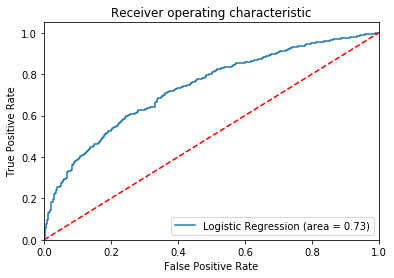

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_1,pro[:,1] )
fpr, tpr, thresholds = roc_curve(test_1, pro[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# LSTM

(Some part of code are copyed from (https://github.com/healthDataScience/deep-learning-HAR) )

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [84]:
data = pd.read_csv("LSTM_data.csv")
data = data[['artist_popularity','followers','popularity','danceability','energy','key','loudness','mode',
        'speechiness','acousticness','instrumentalness','liveness','valence','tempo','days','hit']]

In [85]:
data[0:80000].to_csv("Train_data_lstm.csv",index = None)
data[80000:len(data)].to_csv("Test_data_lstm.csv",index = None)

In [86]:
def read_data(file_name):
    """ Read data """
    path = file_name + ".csv"
    df = pd.read_csv(path)
    df = df[['artist_popularity','followers','popularity','danceability','energy','key','loudness','mode',
        'speechiness','acousticness','instrumentalness','liveness','valence','tempo','days','hit']]
    df.hit.replace(("Yes", "No"), (1, 0), inplace=True)
    # Fixed params
    n_class = 2
    n_steps = 1
    n_channels = 15
    
    "labels"
    labels = df["hit"]
    
    # Initiate array
    X = np.zeros((len(labels), n_steps, n_channels))
    
    for i in range(0,len(labels)):
        for j in range(0, n_steps):
            #seg = segments[j]
            a = df.loc[i][0:15].tolist() # 15 channels
            tmp = []
            tmp = tmp + a
            tmp = np.asarray(tmp)
            X[i,j,:] = tmp
        if i%20000 == 0:
            print(i)  
    return X, labels

In [87]:
def standardize(train, test):
    # Standardize train and test
    X_train = (train - np.mean(train, axis=0)[None,:,:]) / np.std(train, axis=0)[None,:,:]
    X_test = (test - np.mean(test, axis=0)[None,:,:]) / np.std(test, axis=0)[None,:,:]
    return X_train, X_test

In [88]:
def one_hot(labels, n_class = 2):
    expansion = np.eye(n_class)  # generate diagonal matrix
    y = expansion[:, labels-1].T  # Transpose the matrix
    assert y.shape[1] == n_class, "Wrong number of labels!"
    return y

In [89]:
def get_batches(X, y, batch_size):
    n_batches = len(X) // batch_size
    X, y = X[:n_batches*batch_size], y[:n_batches*batch_size]
    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], y[b:b+batch_size]

In [90]:
x_train, labels_train = read_data("Train_data_lstm") # train
x_test, labels_test = read_data("Test_data_lstm") # test

0
20000
40000
60000
0


In [91]:
X_train, X_test = standardize(x_train, x_test)

In [92]:
X_tr, X_vld, lab_tr, lab_vld = train_test_split(X_train, labels_train,  # We want to keep the order of the data, so we trun of the shuffle 
                                                shuffle=False,
                                                stratify = None)

In [93]:
y_tr = one_hot(lab_tr)
y_vld = one_hot(lab_vld)
y_test = one_hot(labels_test)

### Hyperparameters

In [94]:
# Imports
import tensorflow as tf

lstm_size = 45         # 3 times the amount of channels
lstm_layers = 2        # Number of layers
batch_size = 200       # Batch size
seq_len = 1          # Number of steps
learning_rate = 0.0001  # Learning rate (default is 0.001)
epochs = 200

# Fixed
n_classes = 2
n_channels = 15

### Construct the graph

In [95]:
graph = tf.Graph()

# Construct placeholders
with graph.as_default():
    inputs_ = tf.placeholder(tf.float32, [None, seq_len, n_channels], name = 'inputs')
    labels_ = tf.placeholder(tf.float32, [None, n_classes], name = 'labels')
    keep_prob_ = tf.placeholder(tf.float32, name = 'keep')
    learning_rate_ = tf.placeholder(tf.float32, name = 'learning_rate')

In [96]:
with graph.as_default():
    # Construct the LSTM inputs and LSTM cells
    lstm_in = tf.transpose(inputs_, [1,0,2]) # （N, seq_len, channels ）reshape into (seq_len, N, channels)
    lstm_in = tf.reshape(lstm_in, [-1, n_channels]) # Now (seq_len*N, n_channels)
    
    # To cells
    lstm_in = tf.layers.dense(lstm_in, lstm_size, activation=tf.nn.relu) # or tf.nn.relu, tf.nn.sigmoid, tf.nn.tanh?
    
    # Open up the tensor into a list of seq_len pieces
    lstm_in = tf.split(lstm_in, seq_len, 0)
    
    # Add LSTM layers
    lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)  # Add basic LTSM Cell
    
    drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob_)
    
    cell = tf.contrib.rnn.MultiRNNCell([drop] * lstm_layers) # Add multipul RNN Cell
    
    initial_state = cell.zero_state(batch_size, tf.float32)  

Instructions for updating:
Use the retry module or similar alternatives.


In [97]:
with graph.as_default():
    #Creates a recurrent neural network specified by RNNCell cell
    outputs, final_state = tf.contrib.rnn.static_rnn(cell, lstm_in, dtype=tf.float32,
                                                     initial_state = initial_state)
    
    # We only need the last output tensor to pass into a classifier
    logits = tf.layers.dense(outputs[-1], n_classes, name='logits',activation=tf.nn.relu)
    
    # Cost function and optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_))
    #optimizer = tf.train.AdamOptimizer(learning_rate_).minimize(cost) # No grad clipping
    
    # Grad clipping: to avoid gradient explosion
    train_op = tf.train.AdamOptimizer(learning_rate_)
    
    #1.Compute the gradients with compute_gradients()
    gradients = train_op.compute_gradients(cost)
    
    #2.Process the gradients as you wish
    capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients]
    #Given a tensor t, this operation returns a tensor of the same type and shape as t with its values clipped 
    #toclip_value_min and clip_value_max. Any values less than clip_value_min are set to clip_value_min. 
    #Any values greater than clip_value_max are set to clip_value_max.
    
    #3.Apply the processed gradients with apply_gradients().
    optimizer = train_op.apply_gradients(capped_gradients)
    
    # Accuracy
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [98]:
validation_acc = []
validation_loss = []

train_acc = []
train_loss = []

with graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    iteration = 1
    
    for e in range(epochs):
        # Initialize 
        state = sess.run(initial_state)
        
        # Loop over batches
        for x,y in get_batches(X_tr, y_tr, batch_size):
            
            # Feed dictionary
            feed = {inputs_ : x, labels_ : y, keep_prob_ : 0.5, 
                    initial_state : state, learning_rate_ : learning_rate}
            
            loss, _ , state, acc = sess.run([cost, optimizer, final_state, accuracy], 
                                             feed_dict = feed)
            train_acc.append(acc)
            train_loss.append(loss)
            
            # Print at each 5 iters
            if (iteration % 50 == 0):
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {:d}".format(iteration),
                      "Train loss: {:6f}".format(loss),
                      "Train acc: {:.6f}".format(acc))
            
            # Compute validation loss at every 25 iterations
            if (iteration%250 == 0):
                
                # Initiate for validation set
                val_state = sess.run(cell.zero_state(batch_size, tf.float32))
                
                val_acc_ = []
                val_loss_ = []
                for x_v, y_v in get_batches(X_vld, y_vld, batch_size):
                    # Feed
                    feed = {inputs_ : x_v, labels_ : y_v, keep_prob_ : 1.0, initial_state : val_state}
                    
                    # Loss
                    loss_v, state_v, acc_v = sess.run([cost, final_state, accuracy], feed_dict = feed)
                    
                    val_acc_.append(acc_v)
                    val_loss_.append(loss_v)
                
                # Print info
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {:d}".format(iteration),
                      "Validation loss: {:6f}".format(np.mean(val_loss_)),
                      "Validation acc: {:.6f}".format(np.mean(val_acc_)))
                
                # Store
                validation_acc.append(np.mean(val_acc_))
                validation_loss.append(np.mean(val_loss_))
            
            # Iterate 
            iteration += 1
    
  
    
    saver.save(sess,"checkpoints/har-lstm.ckpt")

Epoch: 0/200 Iteration: 50 Train loss: 0.617617 Train acc: 0.725000
Epoch: 0/200 Iteration: 100 Train loss: 0.693046 Train acc: 0.600000
Epoch: 0/200 Iteration: 150 Train loss: 0.599799 Train acc: 0.725000
Epoch: 0/200 Iteration: 200 Train loss: 0.581368 Train acc: 0.730000
Epoch: 0/200 Iteration: 250 Train loss: 0.623055 Train acc: 0.705000
Epoch: 0/200 Iteration: 250 Validation loss: 0.683612 Validation acc: 0.706900
Epoch: 0/200 Iteration: 300 Train loss: 0.612897 Train acc: 0.720000
Epoch: 1/200 Iteration: 350 Train loss: 0.593036 Train acc: 0.725000
Epoch: 1/200 Iteration: 400 Train loss: 0.696407 Train acc: 0.600000
Epoch: 1/200 Iteration: 450 Train loss: 0.601250 Train acc: 0.725000
Epoch: 1/200 Iteration: 500 Train loss: 0.605033 Train acc: 0.730000
Epoch: 1/200 Iteration: 500 Validation loss: 0.680356 Validation acc: 0.706200
Epoch: 1/200 Iteration: 550 Train loss: 0.609042 Train acc: 0.705000
Epoch: 1/200 Iteration: 600 Train loss: 0.602133 Train acc: 0.715000
Epoch: 2/200 It

Epoch: 16/200 Iteration: 4850 Train loss: 0.568839 Train acc: 0.710000
Epoch: 16/200 Iteration: 4900 Train loss: 0.624816 Train acc: 0.710000
Epoch: 16/200 Iteration: 4950 Train loss: 0.508082 Train acc: 0.760000
Epoch: 16/200 Iteration: 5000 Train loss: 0.542312 Train acc: 0.730000
Epoch: 16/200 Iteration: 5000 Validation loss: 0.558434 Validation acc: 0.699100
Epoch: 16/200 Iteration: 5050 Train loss: 0.476580 Train acc: 0.785000
Epoch: 16/200 Iteration: 5100 Train loss: 0.440158 Train acc: 0.775000
Epoch: 17/200 Iteration: 5150 Train loss: 0.577342 Train acc: 0.710000
Epoch: 17/200 Iteration: 5200 Train loss: 0.642038 Train acc: 0.715000
Epoch: 17/200 Iteration: 5250 Train loss: 0.521654 Train acc: 0.740000
Epoch: 17/200 Iteration: 5250 Validation loss: 0.556295 Validation acc: 0.704900
Epoch: 17/200 Iteration: 5300 Train loss: 0.524765 Train acc: 0.740000
Epoch: 17/200 Iteration: 5350 Train loss: 0.473271 Train acc: 0.785000
Epoch: 17/200 Iteration: 5400 Train loss: 0.456972 Train 

Epoch: 31/200 Iteration: 9550 Train loss: 0.488494 Train acc: 0.760000
Epoch: 31/200 Iteration: 9600 Train loss: 0.442841 Train acc: 0.795000
Epoch: 32/200 Iteration: 9650 Train loss: 0.570862 Train acc: 0.735000
Epoch: 32/200 Iteration: 9700 Train loss: 0.605438 Train acc: 0.710000
Epoch: 32/200 Iteration: 9750 Train loss: 0.509313 Train acc: 0.765000
Epoch: 32/200 Iteration: 9750 Validation loss: 0.538954 Validation acc: 0.706500
Epoch: 32/200 Iteration: 9800 Train loss: 0.541200 Train acc: 0.730000
Epoch: 32/200 Iteration: 9850 Train loss: 0.466359 Train acc: 0.805000
Epoch: 32/200 Iteration: 9900 Train loss: 0.420825 Train acc: 0.785000
Epoch: 33/200 Iteration: 9950 Train loss: 0.569996 Train acc: 0.705000
Epoch: 33/200 Iteration: 10000 Train loss: 0.601725 Train acc: 0.700000
Epoch: 33/200 Iteration: 10000 Validation loss: 0.537427 Validation acc: 0.707150
Epoch: 33/200 Iteration: 10050 Train loss: 0.509586 Train acc: 0.760000
Epoch: 33/200 Iteration: 10100 Train loss: 0.531714 Tr

Epoch: 47/200 Iteration: 14250 Train loss: 0.518155 Train acc: 0.745000
Epoch: 47/200 Iteration: 14250 Validation loss: 0.535858 Validation acc: 0.703800
Epoch: 47/200 Iteration: 14300 Train loss: 0.518534 Train acc: 0.750000
Epoch: 47/200 Iteration: 14350 Train loss: 0.447679 Train acc: 0.765000
Epoch: 47/200 Iteration: 14400 Train loss: 0.404281 Train acc: 0.785000
Epoch: 48/200 Iteration: 14450 Train loss: 0.580775 Train acc: 0.725000
Epoch: 48/200 Iteration: 14500 Train loss: 0.619644 Train acc: 0.735000
Epoch: 48/200 Iteration: 14500 Validation loss: 0.534251 Validation acc: 0.703950
Epoch: 48/200 Iteration: 14550 Train loss: 0.501935 Train acc: 0.745000
Epoch: 48/200 Iteration: 14600 Train loss: 0.510015 Train acc: 0.755000
Epoch: 48/200 Iteration: 14650 Train loss: 0.448681 Train acc: 0.805000
Epoch: 48/200 Iteration: 14700 Train loss: 0.420973 Train acc: 0.790000
Epoch: 49/200 Iteration: 14750 Train loss: 0.575470 Train acc: 0.695000
Epoch: 49/200 Iteration: 14750 Validation lo

Epoch: 62/200 Iteration: 18900 Train loss: 0.411486 Train acc: 0.805000
Epoch: 63/200 Iteration: 18950 Train loss: 0.568051 Train acc: 0.710000
Epoch: 63/200 Iteration: 19000 Train loss: 0.576472 Train acc: 0.725000
Epoch: 63/200 Iteration: 19000 Validation loss: 0.534049 Validation acc: 0.700500
Epoch: 63/200 Iteration: 19050 Train loss: 0.479473 Train acc: 0.765000
Epoch: 63/200 Iteration: 19100 Train loss: 0.526371 Train acc: 0.740000
Epoch: 63/200 Iteration: 19150 Train loss: 0.432452 Train acc: 0.800000
Epoch: 63/200 Iteration: 19200 Train loss: 0.413878 Train acc: 0.800000
Epoch: 64/200 Iteration: 19250 Train loss: 0.579757 Train acc: 0.720000
Epoch: 64/200 Iteration: 19250 Validation loss: 0.533466 Validation acc: 0.704550
Epoch: 64/200 Iteration: 19300 Train loss: 0.590001 Train acc: 0.730000
Epoch: 64/200 Iteration: 19350 Train loss: 0.512427 Train acc: 0.735000
Epoch: 64/200 Iteration: 19400 Train loss: 0.517218 Train acc: 0.745000
Epoch: 64/200 Iteration: 19450 Train loss: 0

Epoch: 78/200 Iteration: 23550 Train loss: 0.475394 Train acc: 0.770000
Epoch: 78/200 Iteration: 23600 Train loss: 0.500937 Train acc: 0.730000
Epoch: 78/200 Iteration: 23650 Train loss: 0.412265 Train acc: 0.810000
Epoch: 78/200 Iteration: 23700 Train loss: 0.400711 Train acc: 0.815000
Epoch: 79/200 Iteration: 23750 Train loss: 0.561868 Train acc: 0.725000
Epoch: 79/200 Iteration: 23750 Validation loss: 0.533669 Validation acc: 0.703300
Epoch: 79/200 Iteration: 23800 Train loss: 0.601586 Train acc: 0.730000
Epoch: 79/200 Iteration: 23850 Train loss: 0.490011 Train acc: 0.755000
Epoch: 79/200 Iteration: 23900 Train loss: 0.497647 Train acc: 0.755000
Epoch: 79/200 Iteration: 23950 Train loss: 0.416770 Train acc: 0.830000
Epoch: 79/200 Iteration: 24000 Train loss: 0.425855 Train acc: 0.785000
Epoch: 79/200 Iteration: 24000 Validation loss: 0.534552 Validation acc: 0.701100
Epoch: 80/200 Iteration: 24050 Train loss: 0.573830 Train acc: 0.730000
Epoch: 80/200 Iteration: 24100 Train loss: 0

Epoch: 94/200 Iteration: 28250 Train loss: 0.578331 Train acc: 0.715000
Epoch: 94/200 Iteration: 28250 Validation loss: 0.533418 Validation acc: 0.704400
Epoch: 94/200 Iteration: 28300 Train loss: 0.555733 Train acc: 0.770000
Epoch: 94/200 Iteration: 28350 Train loss: 0.476035 Train acc: 0.750000
Epoch: 94/200 Iteration: 28400 Train loss: 0.488918 Train acc: 0.760000
Epoch: 94/200 Iteration: 28450 Train loss: 0.413513 Train acc: 0.795000
Epoch: 94/200 Iteration: 28500 Train loss: 0.404355 Train acc: 0.805000
Epoch: 94/200 Iteration: 28500 Validation loss: 0.535059 Validation acc: 0.702550
Epoch: 95/200 Iteration: 28550 Train loss: 0.556974 Train acc: 0.750000
Epoch: 95/200 Iteration: 28600 Train loss: 0.559098 Train acc: 0.755000
Epoch: 95/200 Iteration: 28650 Train loss: 0.479896 Train acc: 0.795000
Epoch: 95/200 Iteration: 28700 Train loss: 0.487374 Train acc: 0.750000
Epoch: 95/200 Iteration: 28750 Train loss: 0.400551 Train acc: 0.795000
Epoch: 95/200 Iteration: 28750 Validation lo

Epoch: 109/200 Iteration: 32850 Train loss: 0.465983 Train acc: 0.760000
Epoch: 109/200 Iteration: 32900 Train loss: 0.495324 Train acc: 0.745000
Epoch: 109/200 Iteration: 32950 Train loss: 0.405517 Train acc: 0.795000
Epoch: 109/200 Iteration: 33000 Train loss: 0.385817 Train acc: 0.825000
Epoch: 109/200 Iteration: 33000 Validation loss: 0.535075 Validation acc: 0.701950
Epoch: 110/200 Iteration: 33050 Train loss: 0.555921 Train acc: 0.705000
Epoch: 110/200 Iteration: 33100 Train loss: 0.568745 Train acc: 0.755000
Epoch: 110/200 Iteration: 33150 Train loss: 0.489386 Train acc: 0.765000
Epoch: 110/200 Iteration: 33200 Train loss: 0.476015 Train acc: 0.770000
Epoch: 110/200 Iteration: 33250 Train loss: 0.405903 Train acc: 0.820000
Epoch: 110/200 Iteration: 33250 Validation loss: 0.536635 Validation acc: 0.701300
Epoch: 110/200 Iteration: 33300 Train loss: 0.394421 Train acc: 0.815000
Epoch: 111/200 Iteration: 33350 Train loss: 0.549973 Train acc: 0.740000
Epoch: 111/200 Iteration: 33400

Epoch: 124/200 Iteration: 37450 Train loss: 0.388011 Train acc: 0.805000
Epoch: 124/200 Iteration: 37500 Train loss: 0.381697 Train acc: 0.835000
Epoch: 124/200 Iteration: 37500 Validation loss: 0.535408 Validation acc: 0.700450
Epoch: 125/200 Iteration: 37550 Train loss: 0.564108 Train acc: 0.745000
Epoch: 125/200 Iteration: 37600 Train loss: 0.539233 Train acc: 0.785000
Epoch: 125/200 Iteration: 37650 Train loss: 0.464078 Train acc: 0.785000
Epoch: 125/200 Iteration: 37700 Train loss: 0.502096 Train acc: 0.735000
Epoch: 125/200 Iteration: 37750 Train loss: 0.380982 Train acc: 0.820000
Epoch: 125/200 Iteration: 37750 Validation loss: 0.536992 Validation acc: 0.700550
Epoch: 125/200 Iteration: 37800 Train loss: 0.391196 Train acc: 0.790000
Epoch: 126/200 Iteration: 37850 Train loss: 0.547669 Train acc: 0.720000
Epoch: 126/200 Iteration: 37900 Train loss: 0.540858 Train acc: 0.770000
Epoch: 126/200 Iteration: 37950 Train loss: 0.448224 Train acc: 0.820000
Epoch: 126/200 Iteration: 38000

Epoch: 139/200 Iteration: 42000 Validation loss: 0.536324 Validation acc: 0.694150
Epoch: 140/200 Iteration: 42050 Train loss: 0.558986 Train acc: 0.710000
Epoch: 140/200 Iteration: 42100 Train loss: 0.552399 Train acc: 0.795000
Epoch: 140/200 Iteration: 42150 Train loss: 0.451514 Train acc: 0.785000
Epoch: 140/200 Iteration: 42200 Train loss: 0.513354 Train acc: 0.745000
Epoch: 140/200 Iteration: 42250 Train loss: 0.370253 Train acc: 0.820000
Epoch: 140/200 Iteration: 42250 Validation loss: 0.537117 Validation acc: 0.699050
Epoch: 140/200 Iteration: 42300 Train loss: 0.389176 Train acc: 0.825000
Epoch: 141/200 Iteration: 42350 Train loss: 0.544500 Train acc: 0.740000
Epoch: 141/200 Iteration: 42400 Train loss: 0.531994 Train acc: 0.775000
Epoch: 141/200 Iteration: 42450 Train loss: 0.459253 Train acc: 0.765000
Epoch: 141/200 Iteration: 42500 Train loss: 0.499566 Train acc: 0.750000
Epoch: 141/200 Iteration: 42500 Validation loss: 0.538149 Validation acc: 0.695700
Epoch: 141/200 Iterat

Epoch: 155/200 Iteration: 46600 Train loss: 0.534971 Train acc: 0.775000
Epoch: 155/200 Iteration: 46650 Train loss: 0.439462 Train acc: 0.780000
Epoch: 155/200 Iteration: 46700 Train loss: 0.474564 Train acc: 0.770000
Epoch: 155/200 Iteration: 46750 Train loss: 0.357862 Train acc: 0.820000
Epoch: 155/200 Iteration: 46750 Validation loss: 0.537854 Validation acc: 0.694050
Epoch: 155/200 Iteration: 46800 Train loss: 0.379197 Train acc: 0.835000
Epoch: 156/200 Iteration: 46850 Train loss: 0.532147 Train acc: 0.725000
Epoch: 156/200 Iteration: 46900 Train loss: 0.508063 Train acc: 0.805000
Epoch: 156/200 Iteration: 46950 Train loss: 0.431221 Train acc: 0.795000
Epoch: 156/200 Iteration: 47000 Train loss: 0.478650 Train acc: 0.745000
Epoch: 156/200 Iteration: 47000 Validation loss: 0.538786 Validation acc: 0.694700
Epoch: 156/200 Iteration: 47050 Train loss: 0.371435 Train acc: 0.825000
Epoch: 156/200 Iteration: 47100 Train loss: 0.383542 Train acc: 0.830000
Epoch: 157/200 Iteration: 47150

Epoch: 170/200 Iteration: 51200 Train loss: 0.487507 Train acc: 0.745000
Epoch: 170/200 Iteration: 51250 Train loss: 0.371891 Train acc: 0.815000
Epoch: 170/200 Iteration: 51250 Validation loss: 0.539599 Validation acc: 0.691150
Epoch: 170/200 Iteration: 51300 Train loss: 0.366085 Train acc: 0.825000
Epoch: 171/200 Iteration: 51350 Train loss: 0.514579 Train acc: 0.775000
Epoch: 171/200 Iteration: 51400 Train loss: 0.520875 Train acc: 0.815000
Epoch: 171/200 Iteration: 51450 Train loss: 0.435753 Train acc: 0.795000
Epoch: 171/200 Iteration: 51500 Train loss: 0.464933 Train acc: 0.765000
Epoch: 171/200 Iteration: 51500 Validation loss: 0.539990 Validation acc: 0.691850
Epoch: 171/200 Iteration: 51550 Train loss: 0.372142 Train acc: 0.835000
Epoch: 171/200 Iteration: 51600 Train loss: 0.382201 Train acc: 0.825000
Epoch: 172/200 Iteration: 51650 Train loss: 0.529341 Train acc: 0.750000
Epoch: 172/200 Iteration: 51700 Train loss: 0.525500 Train acc: 0.800000
Epoch: 172/200 Iteration: 51750

Epoch: 185/200 Iteration: 55750 Validation loss: 0.540213 Validation acc: 0.690650
Epoch: 185/200 Iteration: 55800 Train loss: 0.378376 Train acc: 0.830000
Epoch: 186/200 Iteration: 55850 Train loss: 0.527101 Train acc: 0.730000
Epoch: 186/200 Iteration: 55900 Train loss: 0.500524 Train acc: 0.815000
Epoch: 186/200 Iteration: 55950 Train loss: 0.441430 Train acc: 0.790000
Epoch: 186/200 Iteration: 56000 Train loss: 0.476929 Train acc: 0.770000
Epoch: 186/200 Iteration: 56000 Validation loss: 0.541057 Validation acc: 0.690950
Epoch: 186/200 Iteration: 56050 Train loss: 0.354341 Train acc: 0.845000
Epoch: 186/200 Iteration: 56100 Train loss: 0.366716 Train acc: 0.850000
Epoch: 187/200 Iteration: 56150 Train loss: 0.510403 Train acc: 0.735000
Epoch: 187/200 Iteration: 56200 Train loss: 0.524342 Train acc: 0.790000
Epoch: 187/200 Iteration: 56250 Train loss: 0.429092 Train acc: 0.790000
Epoch: 187/200 Iteration: 56250 Validation loss: 0.541828 Validation acc: 0.688950
Epoch: 187/200 Iterat

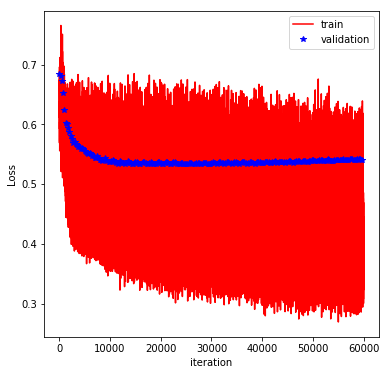

In [99]:
# Plot training and test loss
t = np.arange(iteration-1)

plt.figure(figsize = (6,6))
plt.plot(t, np.array(train_loss), 'r-', t[t % 250 == 0], np.array(validation_loss), 'b*')
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

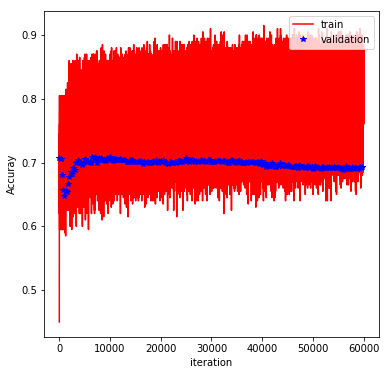

In [100]:
# Plot Accuracies
plt.figure(figsize = (6,6))

plt.plot(t, np.array(train_acc), 'r-', t[t % 250 == 0], validation_acc, 'b*')
plt.xlabel("iteration")
plt.ylabel("Accuray")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [101]:
test_acc = []

with tf.Session(graph=graph) as sess:
    # Restore
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    test_state = sess.run(cell.zero_state(batch_size, tf.float32))
    
    for x_t, y_t in get_batches(X_test, y_test, batch_size):
        feed = {inputs_: x_t,
                labels_: y_t,
                keep_prob_: 1,
                initial_state: test_state}
        
        batch_acc, test_state = sess.run([accuracy, final_state], feed_dict=feed)
        test_acc.append(batch_acc)
    print("Test accuracy: {:.6f}".format(np.mean(test_acc)))

INFO:tensorflow:Restoring parameters from checkpoints\har-lstm.ckpt
Test accuracy: 0.673333
